<a href="https://colab.research.google.com/github/tiagoflorin/DataScience1/blob/clase_6/Manejo_de_datos_ausentes_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📓 Clase: Manejo de Datos Ausentes en Data Science
**Objetivo:** Comprender qué son los datos ausentes (missing data), por qué ocurren, cómo detectarlos y aprender diversas técnicas para manejarlos utilizando Python, Pandas y Scikit-learn.
**Librerías Principales:***
* Pandas: Para manipulación y análisis de datos.
* NumPy: Para operaciones numéricas y el manejo de NaN.
* Matplotlib/Seaborn: Para visualización.
* Missingno: Para visualización específica de datos ausentes.
* Scikit-learn: Para técnicas de imputación más avanzadas.

## 1. Introducción: ¿Qué son los Datos Ausentes y por qué nos importan?

Los datos ausentes, a menudo representados como `NaN` (Not a Number), `None`, o simplemente celdas vacías en un conjunto de datos, son un problema común en el análisis de datos y el machine learning.

**¿Por qué ocurren?**

* Errores en la recolección de datos (manual o automática).
* Fusión de datasets con diferentes columnas o identificadores.
* Respuestas no proporcionadas por los encuestados (e.g., preguntas sensibles).
* Datos que no aplican a ciertos registros.
* Fallos técnicos durante la transmisión o almacenamiento.

**¿Por qué son un problema?**

* Muchos algoritmos de machine learning no pueden funcionar directamente con datos ausentes (e.g., regresión lineal, SVM, redes neuronales).
* Pueden reducir el poder estadístico de un análisis.
* Pueden introducir sesgos en los resultados si no se manejan adecuadamente.
* Pueden llevar a conclusiones erróneas.

## 2. Configuración del Entorno

In [ ]:
# Importación de librerías fundamentales
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librería especializada en visualización de datos ausentes
# Si no está instalada, descomentar y ejecutar la siguiente línea en Colab:
# !pip install missingno
import missingno as msno

# Librerías de Scikit-learn para imputación
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split # Para demostrar buenas prácticas

# Configuraciones adicionales (opcional)
pd.set_option('display.max_columns', None) # Mostrar todas las columnas
sns.set_style('whitegrid') # Estilo de gráficos Seaborn
plt.rcParams['figure.figsize'] = (10, 6) # Tamaño de figuras Matplotlib

## 3. Creación de un Dataset de Ejemplo

In [ ]:
# Crear un diccionario con los datos
data = {
    'ID_Estudiante': range(1, 11),
    'Edad': [18, 19, 20, np.nan, 21, 22, 19, 20, 23, 18],
    'Nota_Parcial1': [7.5, 8.0, 5.5, 6.0, 9.0, np.nan, 7.0, 8.5, np.nan, 6.5],
    'Nota_Parcial2': [8.0, 8.5, 6.0, 6.5, 9.5, 7.0, 7.5, 9.0, 8.0, np.nan],
    'Asistencia_%': [90, 85, 70, 75, 95, 80, np.nan, 100, 88, 92],
    'Ciudad_Origen': ['Madrid', 'Barcelona', 'Valencia', 'Madrid', np.nan, 'Sevilla', 'Barcelona', 'Madrid', 'Bilbao', 'Valencia'],
    'Beca_Activa': [True, False, True, False, True, False, np.nan, True, False, True]
}

# Crear el DataFrame
df = pd.DataFrame(data)

In [ ]:
df.head()

,ID_Estudiante,Edad,Nota_Parcial1,Nota_Parcial2,Asistencia_%,Ciudad_Origen,Beca_Activa
0,1,18.0,7.5,8.0,90.0,Madrid,True
1,2,19.0,8.0,8.5,85.0,Barcelona,False
2,3,20.0,5.5,6.0,70.0,Valencia,True
3,4,NaN,6.0,6.5,75.0,Madrid,False
4,5,21.0,9.0,9.5,95.0,NaN,True


## 4. Identificación de Datos Ausentes

### 4.1 Conteo de Nulos

In [ ]:
# Contar valores nulos por columna
print("Conteo de valores nulos por columna:")
print(df.isnull().sum())

# Calcular el porcentaje de valores nulos por columna
print("\nPorcentaje de valores nulos por columna:")
print((df.isnull().sum() / len(df)) * 100)

Conteo de valores nulos por columna:
ID_Estudiante    0
Edad             1
Nota_Parcial1    2
Nota_Parcial2    1
Asistencia_%     1
Ciudad_Origen    1
Beca_Activa      1
dtype: int64

Porcentaje de valores nulos por columna:
ID_Estudiante     0.0
Edad             10.0
Nota_Parcial1    20.0
Nota_Parcial2    10.0
Asistencia_%     10.0
Ciudad_Origen    10.0
Beca_Activa      10.0
dtype: float64


* Vemos que `Edad`, `Nota_Parcial1`, `Nota_Parcial2`, `Asistencia_%`, `Ciudad_Origen` y `Beca_Activa` tienen valores ausentes.
* Es útil ver tanto el conteo absoluto como el porcentaje para entender la magnitud del problema en cada columna.

### 4.2. Visualización de Datos Ausentes

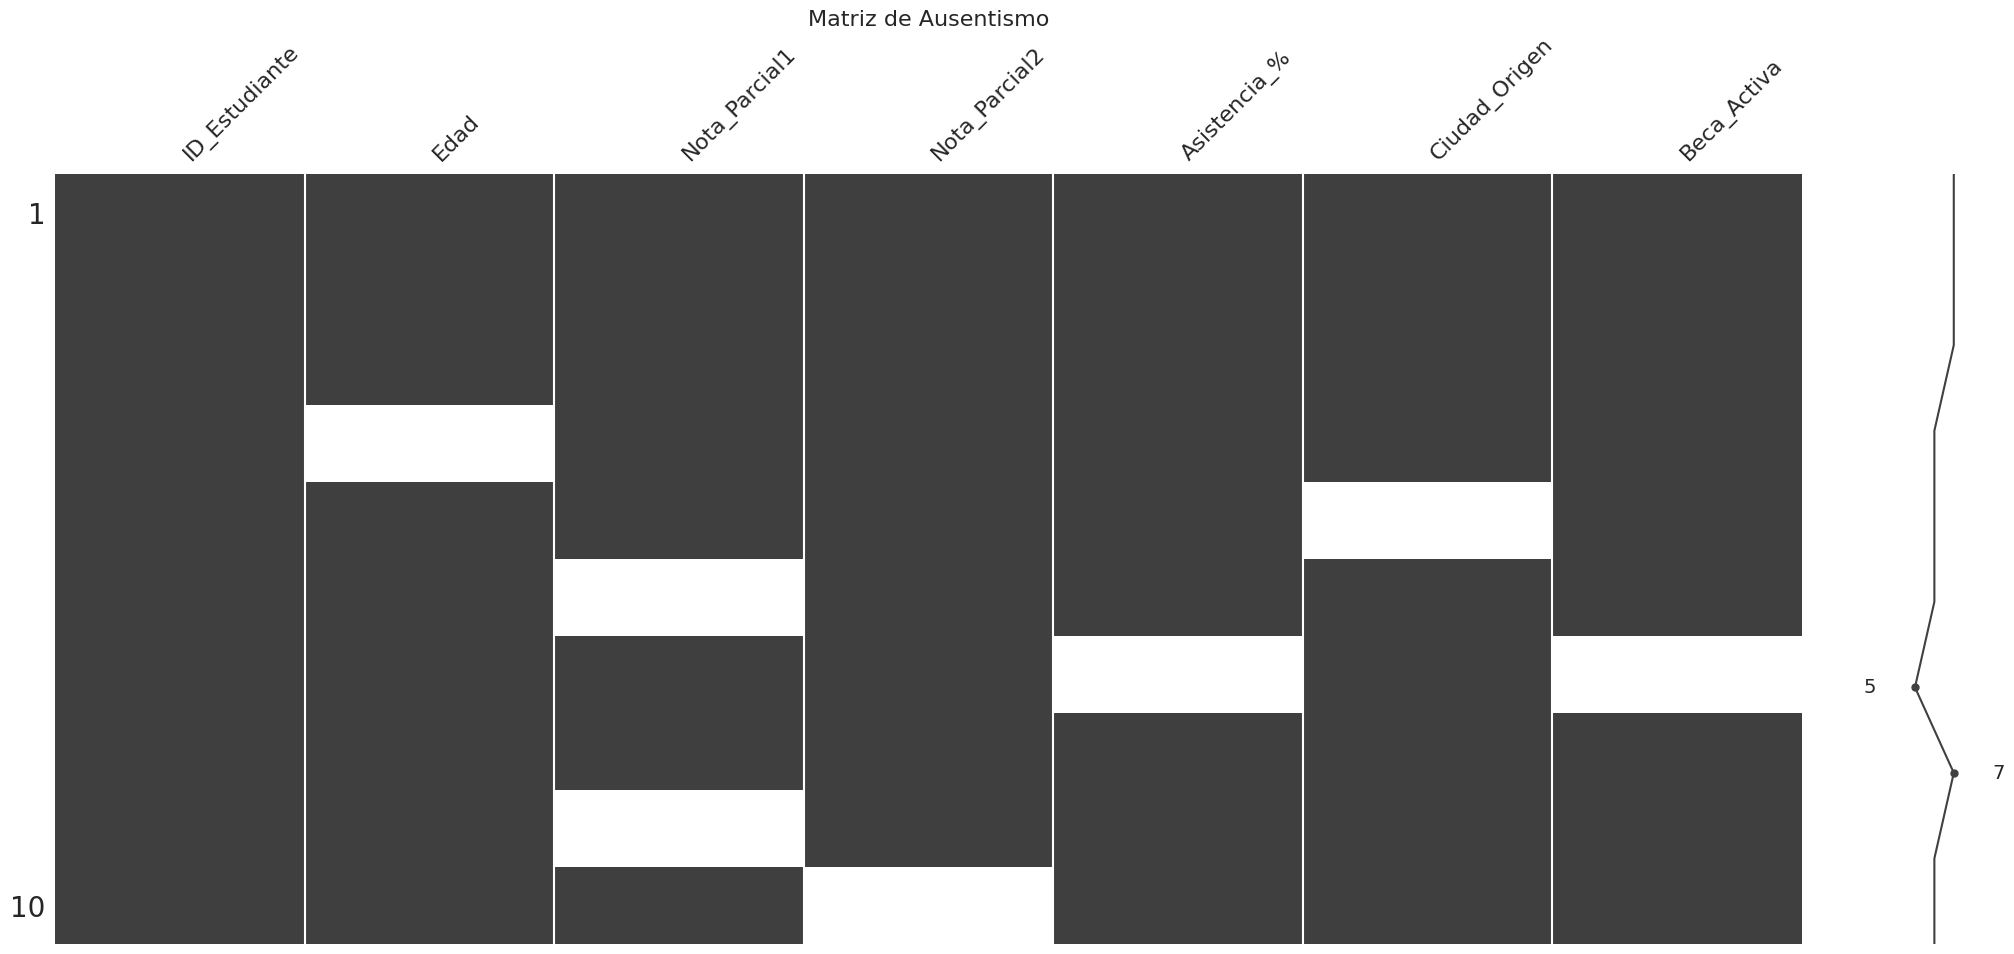

In [ ]:
# Matriz de ausentismo: visualiza la ubicación de los NaN
msno.matrix(df)
plt.title('Matriz de Ausentismo', fontsize=16)
plt.show()

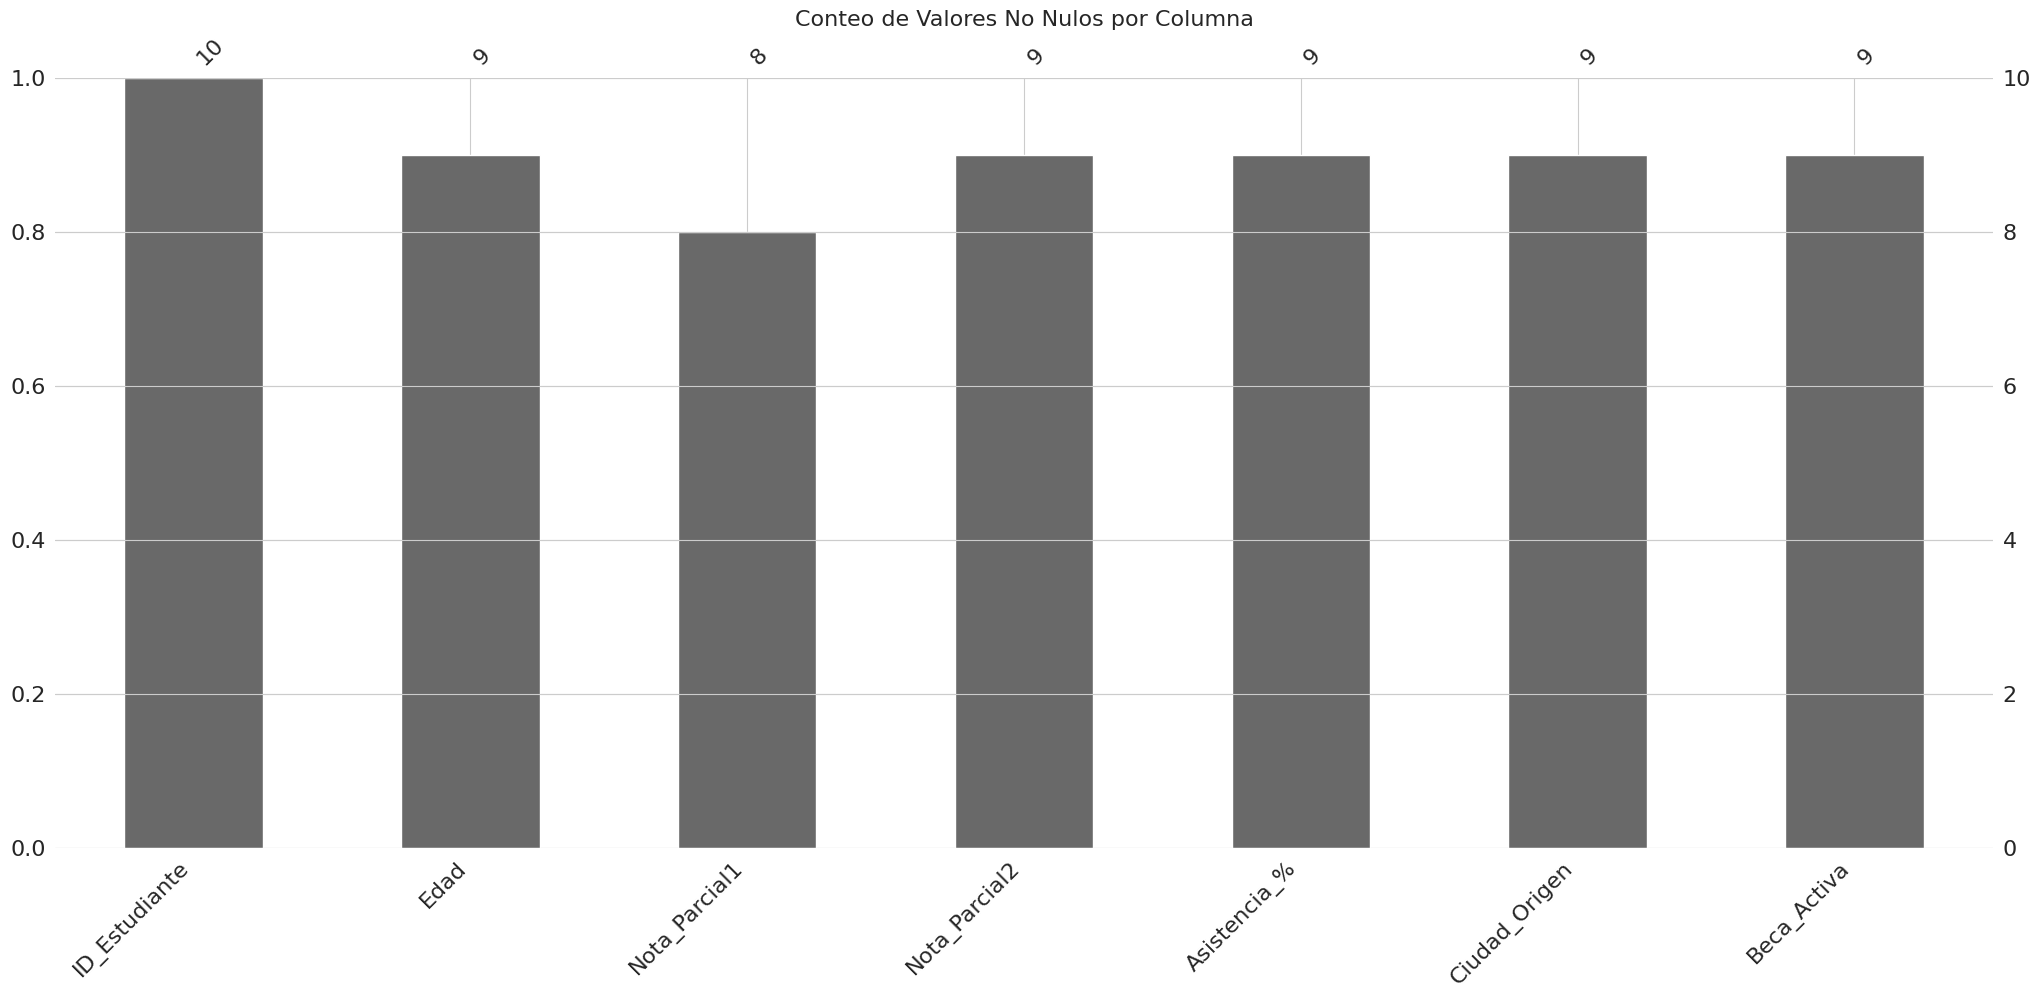

In [ ]:
# Gráfico de barras de ausentismo: similar a .isnull().sum() pero gráfico
msno.bar(df)
plt.title('Conteo de Valores No Nulos por Columna', fontsize=16)
plt.show()

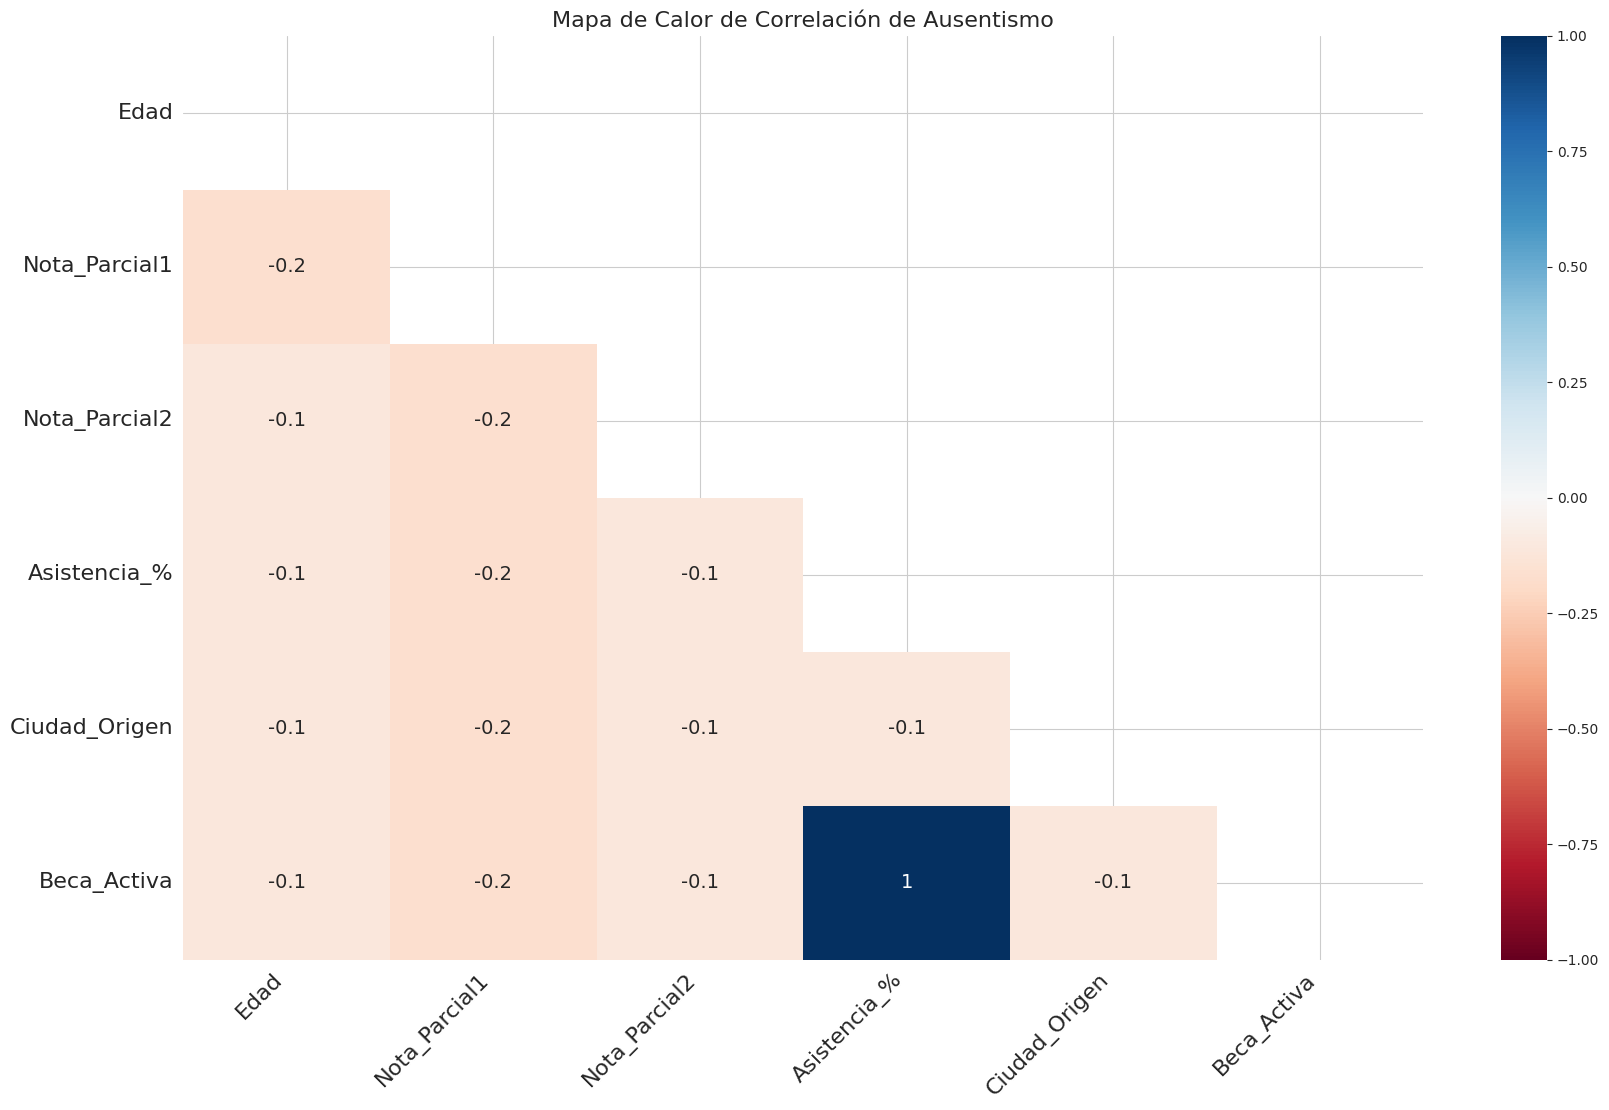

In [ ]:
# Mapa de calor de correlación de ausentismo:
# Muestra si la ausencia de valor en una variable se relaciona con la ausencia en otra.
# Una correlación cercana a 1 significa que si falta un dato en A, es muy probable que falte en B.
# Una correlación cercana a -1 significa que si falta un dato en A, es muy probable que NO falte en B.
# Cerca de 0 indica poca relación lineal en la ausentismo.
msno.heatmap(df)
plt.title('Mapa de Calor de Correlación de Ausentismo', fontsize=16)
plt.show()

**Interpretación de las Visualizaciones:**
* La matriz muestra dónde están los huecos (líneas blancas).
* El gráfico de barras confirma el conteo de nulos.
* El mapa de calor puede revelar relaciones interesantes. Por ejemplo, si `Nota_Parcial1` y `Nota_Parcial2` tuvieran una alta correlación de ausentismo, podría indicar un problema sistemático (e.g., un estudiante que faltó a ambos exámenes). En nuestro caso, las correlaciones son bajas o inexistentes.
* El dendrograma agrupa visualmente las columnas con patrones de nulidad similares.

## 5. Estrategias para Manejar Datos Ausentes

Existen varias formas de abordar los datos ausentes. La elección depende del contexto, la cantidad de datos faltantes, el tipo de variable y el objetivo del análisis o modelo.


### 5.1. Eliminación de Datos (Deletion)

Es la estrategia más simple, pero a menudo no la más recomendable porque puede llevar a pérdida de información valiosa.


#### 5.1.1. Eliminación por Filas (Listwise Deletion)

Se eliminan todas las filas que contengan al menos un valor ausente.

In [ ]:
# Crear una copia para no modificar el original
df_eliminado_filas = df.copy()

# Eliminar filas con cualquier valor NaN
df_eliminado_filas.dropna(axis=0, inplace=True) # axis=0 indica filas

print("Tamaño del DataFrame original:", df.shape)
print("Tamaño después de eliminar filas con NaN:", df_eliminado_filas.shape)
print("\nDataFrame resultante:")
print(df_eliminado_filas)

Tamaño del DataFrame original: (10, 7)
Tamaño después de eliminar filas con NaN: (4, 7)

DataFrame resultante:
   ID_Estudiante  Edad  Nota_Parcial1  Nota_Parcial2  Asistencia_%  \
0              1  18.0            7.5            8.0          90.0   
1              2  19.0            8.0            8.5          85.0   
2              3  20.0            5.5            6.0          70.0   
7              8  20.0            8.5            9.0         100.0   

  Ciudad_Origen Beca_Activa  
0        Madrid        True  
1     Barcelona       False  
2      Valencia        True  
7        Madrid        True  


**Pros:**

* Simple de implementar.
* Los análisis resultantes se basan en datos completos.

**Contras:**

* Pérdida significativa de datos: Si los valores ausentes están dispersos, se pueden perder muchas filas. En nuestro ejemplo, ¡perdimos 6 de 10 filas!
* Puede introducir sesgos: Si los datos no faltan completamente al azar (MCAR - Missing Completely At Random), eliminar filas puede sesgar la muestra restante.

#### 5.1.2. Eliminación por Columnas (Column Deletion)

Se eliminan columnas enteras si tienen demasiados valores ausentes (se suele definir un umbral, e.g., 50% o 70%).

In [ ]:
# Crear una copia
df_eliminado_cols = df.copy()

# Definir un umbral (ej. 30% de valores ausentes)
umbral = 0.3 * len(df_eliminado_cols)

# Identificar columnas a eliminar
columnas_a_eliminar = df_eliminado_cols.columns[df_eliminado_cols.isnull().sum() > umbral]
print("Columnas a eliminar (más del 30% de NaN):", columnas_a_eliminar.tolist())

# Eliminar las columnas identificadas
df_eliminado_cols.drop(columns=columnas_a_eliminar, inplace=True)

print("\nTamaño del DataFrame original:", df.shape)
print("Tamaño después de eliminar columnas con >30% NaN:", df_eliminado_cols.shape)
print("\nDataFrame resultante:")
df_eliminado_cols.head() # Mostrar solo las primeras filas

Columnas a eliminar (más del 30% de NaN): []

Tamaño del DataFrame original: (10, 7)
Tamaño después de eliminar columnas con >30% NaN: (10, 7)

DataFrame resultante:


,ID_Estudiante,Edad,Nota_Parcial1,Nota_Parcial2,Asistencia_%,Ciudad_Origen,Beca_Activa
0,1,18.0,7.5,8.0,90.0,Madrid,True
1,2,19.0,8.0,8.5,85.0,Barcelona,False
2,3,20.0,5.5,6.0,70.0,Valencia,True
3,4,NaN,6.0,6.5,75.0,Madrid,False
4,5,21.0,9.0,9.5,95.0,NaN,True


**Pros:**

* Puede ser útil si una columna es irrelevante o tiene demasiados datos faltantes para ser útil.
* Conserva más filas que la eliminación por filas si los nulos se concentran en pocas columnas.

**Contras:**

* Pérdida de información potencial: Incluso una columna con muchos nulos podría contener información valiosa en los datos existentes.
* Decisión subjetiva basada en el umbral.

**Conclusión sobre Eliminación:** Usar con precaución. Generalmente se prefiere la imputación, a menos que la cantidad de datos eliminados sea muy pequeña o las variables eliminadas no sean importantes para el análisis.

## 5.2. Imputación Simple

La imputación consiste en reemplazar los valores ausentes por valores estimados. Las técnicas simples son fáciles de aplicar pero tienen sus limitaciones.
##### **Importante:** Siempre es buena práctica realizar la imputación después de dividir los datos en conjuntos de entrenamiento y prueba (train/test split) para evitar la fuga de datos (data leakage), especialmente si se usan estadísticas como la media o la mediana calculadas sobre todo el dataset. Para esta clase, aplicaremos la imputación al DataFrame completo por simplicidad demostrativa, pero hay que tenerlo en cuenta para proyectos reales.


### 5.2.1. Imputación con la Media (Mean Imputation) - Variables Numéricas

In [ ]:
# Crear una copia
df_imputado_media = df.copy()

# Seleccionar columnas numéricas (excluyendo ID)
columnas_numericas = df_imputado_media.select_dtypes(include=np.number).columns.drop('ID_Estudiante')

# Calcular la media para cada columna numérica
medias = df_imputado_media[columnas_numericas].mean()
print("Medias calculadas:\n", medias)

# Imputar los NaN con la media correspondiente
for col in columnas_numericas:
    df_imputado_media[col].fillna(medias[col], inplace=True)

Medias calculadas:
 Edad             20.000000
Nota_Parcial1     7.250000
Nota_Parcial2     7.777778
Asistencia_%     86.111111
dtype: float64


<ipython-input-13-251a0e215c3e>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputado_media[col].fillna(medias[col], inplace=True)


In [ ]:
print("\nDataFrame después de imputación por media:")
df_imputado_media.isnull().sum() # Verificar que no hay nulos numéricos


DataFrame después de imputación por media:


,0
ID_Estudiante,0
Edad,0
Nota_Parcial1,0
Nota_Parcial2,0
Asistencia_%,0
Ciudad_Origen,1
Beca_Activa,1


In [ ]:
df_imputado_media.head()

,ID_Estudiante,Edad,Nota_Parcial1,Nota_Parcial2,Asistencia_%,Ciudad_Origen,Beca_Activa
0,1,18.0,7.5,8.0,90.0,Madrid,True
1,2,19.0,8.0,8.5,85.0,Barcelona,False
2,3,20.0,5.5,6.0,70.0,Valencia,True
3,4,20.0,6.0,6.5,75.0,Madrid,False
4,5,21.0,9.0,9.5,95.0,NaN,True


**Pros:**

* Simple y rápido.
* Mantiene el tamaño de la muestra.
* No distorsiona la media de la variable.

**Contras:**

* Reduce la varianza: Al añadir valores idénticos (la media), la dispersión de los datos disminuye artificialmente.
* Distorsiona las relaciones entre variables (correlaciones): Puede atenuar o incluso crear correlaciones espurias.
* Sensible a outliers (valores atípicos). Si hay outliers, la media puede no ser representativa del centro de los datos.

### 5.2.2. Imputación con la Mediana (Median Imputation) - Variables Numéricas


In [ ]:
# Crear una copia
df_imputado_mediana = df.copy()

# Calcular la mediana para cada columna numérica
medianas = df_imputado_mediana[columnas_numericas].median()
print("Medianas calculadas:\n", medianas)

# Imputar los NaN con la mediana correspondiente
for col in columnas_numericas:
    df_imputado_mediana[col].fillna(medianas[col], inplace=True)

Medianas calculadas:
 Edad             20.00
Nota_Parcial1     7.25
Nota_Parcial2     8.00
Asistencia_%     88.00
dtype: float64


<ipython-input-16-ab1e8df42850>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputado_mediana[col].fillna(medianas[col], inplace=True)


In [ ]:
print("\nDataFrame después de imputación por mediana:")
print(df_imputado_mediana.isnull().sum())


DataFrame después de imputación por mediana:
ID_Estudiante    0
Edad             0
Nota_Parcial1    0
Nota_Parcial2    0
Asistencia_%     0
Ciudad_Origen    1
Beca_Activa      1
dtype: int64


In [ ]:
df_imputado_mediana.head()

,ID_Estudiante,Edad,Nota_Parcial1,Nota_Parcial2,Asistencia_%,Ciudad_Origen,Beca_Activa
0,1,18.0,7.5,8.0,90.0,Madrid,True
1,2,19.0,8.0,8.5,85.0,Barcelona,False
2,3,20.0,5.5,6.0,70.0,Valencia,True
3,4,20.0,6.0,6.5,75.0,Madrid,False
4,5,21.0,9.0,9.5,95.0,NaN,True


**Pros:**

* Simple y rápido.
* Mantiene el tamaño de la muestra.
* Robusto a outliers: La mediana no se ve afectada por valores extremos como la media. Es preferible para distribuciones asimétricas.

**Contras:**

* Reduce la varianza (aunque generalmente menos que la media).
* Distorsiona las relaciones entre variables.


### 5.2.3. Imputación con la Moda (Mode Imputation) - Variables Categóricas (y Numéricas Discretas)

In [ ]:
# Crear una copia (usaremos la copia imputada por mediana para las numéricas)
df_imputado_moda = df_imputado_mediana.copy() # Partimos de un DF con numéricos ya imputados

# Seleccionar columnas categóricas y booleanas (que trataremos como categóricas aquí)
columnas_categoricas = df_imputado_moda.select_dtypes(include=['object', 'boolean']).columns

# Calcular la moda para cada columna categórica/booleana
# .mode()[0] se usa porque puede haber más de una moda; tomamos la primera.
modas = df_imputado_moda[columnas_categoricas].mode().iloc[0]
print("Modas calculadas:\n", modas)

# Imputar los NaN con la moda correspondiente
for col in columnas_categoricas:
    df_imputado_moda[col].fillna(modas[col], inplace=True)

Modas calculadas:
 Ciudad_Origen    Madrid
Beca_Activa        True
Name: 0, dtype: object


<ipython-input-19-636c96eb6b1f>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputado_moda[col].fillna(modas[col], inplace=True)
<ipython-input-19-636c96eb6b1f>:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_imputado_moda[col].fillna(modas[col], inplace=True)


In [ ]:
print("\nDataFrame después de imputación por moda (categóricas):")
df_imputado_moda.isnull().sum() # Verificar que no quedan nulos


DataFrame después de imputación por moda (categóricas):


,0
ID_Estudiante,0
Edad,0
Nota_Parcial1,0
Nota_Parcial2,0
Asistencia_%,0
Ciudad_Origen,0
Beca_Activa,0


In [ ]:
df_imputado_moda

,ID_Estudiante,Edad,Nota_Parcial1,Nota_Parcial2,Asistencia_%,Ciudad_Origen,Beca_Activa
0,1,18.0,7.50,8.0,90.0,Madrid,True
1,2,19.0,8.00,8.5,85.0,Barcelona,False
2,3,20.0,5.50,6.0,70.0,Valencia,True
3,4,20.0,6.00,6.5,75.0,Madrid,False
4,5,21.0,9.00,9.5,95.0,Madrid,True
5,6,22.0,7.25,7.0,80.0,Sevilla,False
6,7,19.0,7.00,7.5,88.0,Barcelona,True
7,8,20.0,8.50,9.0,100.0,Madrid,True
8,9,23.0,7.25,8.0,88.0,Bilbao,False
9,10,18.0,6.50,8.0,92.0,Valencia,True


**Pros:**

* Simple y aplicable a datos categóricos.
* Mantiene el tamaño de la muestra.

**Contras:**

* Puede distorsionar la distribución de frecuencias de la variable categórica.
* Si hay múltiples modas, la elección puede ser arbitraria.
* No considera relaciones entre variables.

### 5.2.4. Imputación con Scikit-learn (SimpleImputer)

Scikit-learn proporciona una forma estandarizada de aplicar estas imputaciones simples (media, mediana, moda, constante). Es especialmente útil en pipelines de machine learning.


In [ ]:
# Crear copias separadas para cada estrategia con SimpleImputer
df_simple_media = df.copy()
df_simple_mediana = df.copy()
df_simple_moda_cat = df.copy() # Para categóricas
df_simple_moda_bool = df.copy() # Para booleanas

# --- Imputación Media (Numéricas) ---
imputer_media = SimpleImputer(strategy='mean')
# Ajustar y transformar SOLO las columnas numéricas
df_simple_media[columnas_numericas] = imputer_media.fit_transform(df_simple_media[columnas_numericas])
print("--- SimpleImputer: Media (Numéricas) ---")
print(df_simple_media[columnas_numericas].head())
print("Nulos restantes en numéricas:", df_simple_media[columnas_numericas].isnull().sum().sum())


# --- Imputación Mediana (Numéricas) ---
imputer_mediana = SimpleImputer(strategy='median')
df_simple_mediana[columnas_numericas] = imputer_mediana.fit_transform(df_simple_mediana[columnas_numericas])
print("\n--- SimpleImputer: Mediana (Numéricas) ---")
print(df_simple_mediana[columnas_numericas].head())
print("Nulos restantes en numéricas:", df_simple_mediana[columnas_numericas].isnull().sum().sum())


# --- Imputación Moda (Categóricas - 'object') ---
col_cat_object = df_simple_moda_cat.select_dtypes(include='object').columns
imputer_moda_cat = SimpleImputer(strategy='most_frequent')
df_simple_moda_cat[col_cat_object] = imputer_moda_cat.fit_transform(df_simple_moda_cat[col_cat_object])
print("\n--- SimpleImputer: Moda (Categóricas 'object') ---")
print(df_simple_moda_cat[col_cat_object].head())
print("Nulos restantes en categóricas 'object':", df_simple_moda_cat[col_cat_object].isnull().sum().sum())

# --- Imputación Moda (Booleanas - tratadas como categóricas) ---
col_bool = ['Beca_Activa'] # Seleccionar columna booleana explícitamente
imputer_moda_bool = SimpleImputer(strategy='most_frequent')
# Necesitamos reshape(-1, 1) si es una sola columna
df_simple_moda_bool[col_bool] = imputer_moda_bool.fit_transform(df_simple_moda_bool[col_bool])
print("\n--- SimpleImputer: Moda (Booleanas) ---")
print(df_simple_moda_bool[col_bool].head())
print("Nulos restantes en booleanas:", df_simple_moda_bool[col_bool].isnull().sum().sum())


NameError: name 'df' is not defined

## 5.3. Interpolación

La interpolación estima los valores ausentes basándose en los valores conocidos alrededor del dato faltante. Es especialmente útil para series temporales o datos con algún tipo de orden secuencial.


In [ ]:
# Crear una copia
df_interpolado = df.copy()

# Asegurarse de que el DataFrame está ordenado si es relevante (ej. por ID o tiempo)
df_interpolado.sort_values(by='ID_Estudiante', inplace=True) # Ya estaba ordenado, pero es buena práctica

# --- Interpolación Lineal ---
# Estima el valor como un punto en la línea recta entre los dos puntos conocidos más cercanos.
df_interpolado['Nota_Parcial1_Linear'] = df_interpolado['Nota_Parcial1'].interpolate(method='linear')
df_interpolado['Asistencia_%_Linear'] = df_interpolado['Asistencia_%'].interpolate(method='linear')

In [ ]:
print("\nDataFrame después de interpolación (mostrando columnas relevantes):")
cols_mostrar = ['ID_Estudiante', 'Nota_Parcial1', 'Nota_Parcial1_Linear', 'Asistencia_%', 'Asistencia_%_Linear']
df_interpolado[cols_mostrar]


DataFrame después de interpolación (mostrando columnas relevantes):


,ID_Estudiante,Nota_Parcial1,Nota_Parcial1_Linear,Asistencia_%,Asistencia_%_Linear
0,1,7.5,7.5,90.0,90.0
1,2,8.0,8.0,85.0,85.0
2,3,5.5,5.5,70.0,70.0
3,4,6.0,6.0,75.0,75.0
4,5,9.0,9.0,95.0,95.0
5,6,NaN,8.0,80.0,80.0
6,7,7.0,7.0,NaN,90.0
7,8,8.5,8.5,100.0,100.0
8,9,NaN,7.5,88.0,88.0
9,10,6.5,6.5,92.0,92.0


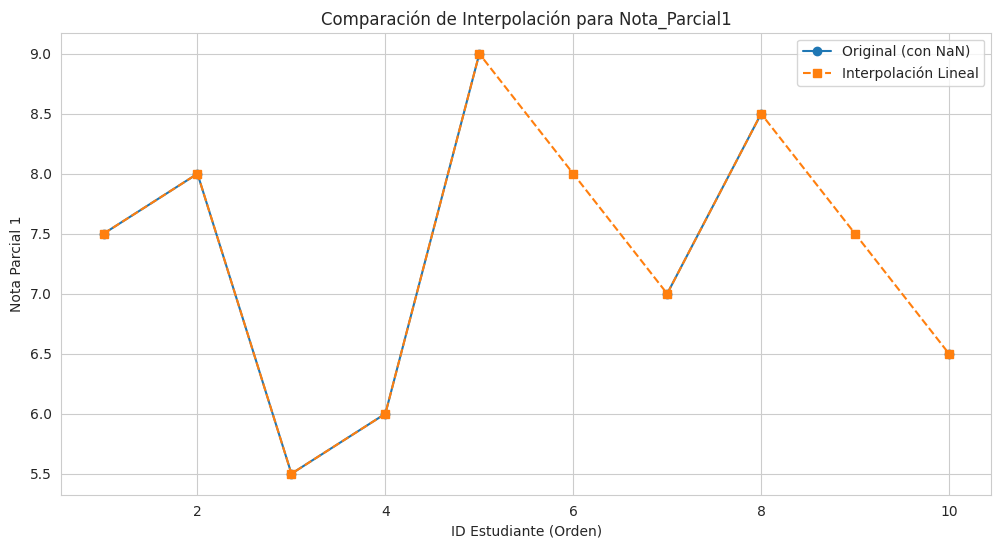

In [ ]:
# Graficar para comparar
plt.figure(figsize=(12, 6))
plt.plot(df_interpolado['ID_Estudiante'], df_interpolado['Nota_Parcial1'], 'o-', label='Original (con NaN)')
plt.plot(df_interpolado['ID_Estudiante'], df_interpolado['Nota_Parcial1_Linear'], 's--', label='Interpolación Lineal')
plt.title('Comparación de Interpolación para Nota_Parcial1')
plt.xlabel('ID Estudiante (Orden)')
plt.ylabel('Nota Parcial 1')
plt.legend()
plt.show()

**Pros:**

* Utiliza información de los puntos vecinos, potencialmente más preciso que la media/mediana global.
* Bueno para datos ordenados o series temporales.

**Contras:**
* Asume que existe una relación (lineal, polinómica, etc.) entre los puntos.
* No funciona bien si los datos no tienen un orden lógico o si faltan valores al principio/final de la secuencia (no puede extrapolar por defecto).
* Generalmente aplicable solo a variables numéricas.

## 5.4. Imputación Avanzada (Multivariante)

Estas técnicas utilizan información de otras variables para predecir y rellenar los valores ausentes. Son computacionalmente más costosas pero a menudo más precisas.

###### **Importante:** Estas técnicas requieren que todas las variables predictoras estén completas. Por lo tanto, a menudo se aplican después de haber tratado los nulos en algunas variables con métodos más simples, o se usan de forma iterativa. También suelen requerir que los datos sean numéricos (las categóricas deben codificarse primero).

#### 5.4.1. Imputación KNN (KNNImputer)

Reemplaza los valores ausentes utilizando la media (o mediana) de los k vecinos más cercanos en el espacio de características. Los vecinos se encuentran usando las columnas donde no faltan datos.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear una copia y seleccionar solo columnas numéricas
df_knn = df[columnas_numericas].copy()

# --- Preprocesamiento: Escalar datos ---
# KNN se basa en distancias, por lo que escalar es importante.
scaler = MinMaxScaler()
df_knn_scaled = scaler.fit_transform(df_knn)
df_knn_scaled = pd.DataFrame(df_knn_scaled, columns=columnas_numericas) # Convertir a DataFrame

In [ ]:
df_knn_scaled

,Edad,Nota_Parcial1,Nota_Parcial2,Asistencia_%
0,0.0,0.571429,0.571429,0.666667
1,0.2,0.714286,0.714286,0.500000
2,0.4,0.000000,0.000000,0.000000
3,NaN,0.142857,0.142857,0.166667
4,0.6,1.000000,1.000000,0.833333
5,0.8,NaN,0.285714,0.333333
6,0.2,0.428571,0.428571,NaN
7,0.4,0.857143,0.857143,1.000000
8,1.0,NaN,0.571429,0.600000
9,0.0,0.285714,NaN,0.733333


In [ ]:
# --- Aplicar KNNImputer ---
# n_neighbors=3 significa usar los 3 vecinos más cercanos
imputer_knn = KNNImputer(n_neighbors=3)
df_knn_imputed_scaled = imputer_knn.fit_transform(df_knn_scaled)

In [ ]:
# --- Revertir el escalado ---
df_knn_imputed = scaler.inverse_transform(df_knn_imputed_scaled)
df_knn_imputed = pd.DataFrame(df_knn_imputed, columns=columnas_numericas) # Convertir a DataFrame

In [ ]:
print("\nDataFrame después de KNN Imputation (k=3):")
print(df_knn_imputed.head())
print("\nNulos restantes:", df_knn_imputed.isnull().sum().sum())


DataFrame después de KNN Imputation (k=3):
        Edad  Nota_Parcial1  Nota_Parcial2  Asistencia_%
0  18.000000            7.5            8.0          90.0
1  19.000000            8.0            8.5          85.0
2  20.000000            5.5            6.0          70.0
3  20.333333            6.0            6.5          75.0
4  21.000000            9.0            9.5          95.0

Nulos restantes: 0


In [ ]:
# Comparar con imputación por mediana para 'Nota_Parcial1'
print("\nComparación para Nota_Parcial1 (fila 5 donde faltaba):")
print(" - Original:", df['Nota_Parcial1'].iloc[5]) # Era NaN
print(" - Mediana:", df_imputado_mediana['Nota_Parcial1'].iloc[3])
print(" - KNN:", df_knn_imputed['Nota_Parcial1'].iloc[3])

print("\nComparación para Asistencia_% (fila 6 donde faltaba):")
print(" - Original:", df['Asistencia_%'].iloc[6]) # Era NaN
print(" - Mediana:", df_imputado_mediana['Asistencia_%'].iloc[6])
print(" - KNN:", df_knn_imputed['Asistencia_%'].iloc[6])


Comparación para Nota_Parcial1 (fila 5 donde faltaba):
 - Original: nan
 - Mediana: 6.0
 - KNN: 6.0

Comparación para Asistencia_% (fila 6 donde faltaba):
 - Original: nan
 - Mediana: 88.0
 - KNN: 89.0


**Pros:**
* Utiliza información de múltiples variables (relaciones).
* Puede capturar estructuras de datos más complejas.
* Generalmente más preciso que la imputación simple si las variables están correlacionadas.

**Contras:**

* Computacionalmente más costoso, especialmente con datasets grandes.
* Sensible a la elección de k y la métrica de distancia.
* Sensible a la escala de las variables (requiere escalado).
* Puede funcionar mal si las variables relevantes para la imputación también tienen muchos nulos.
* Requiere datos numéricos (codificar categóricas).

# Imputación de Datos Usando Solo Pandas

1. Identificar Nulos:
* `.isnull()` o `.isna()`: Devuelve un DataFrame booleano indicando dónde hay NaN.
* `.isnull().sum()`: Cuenta los nulos por columna (muy útil).
2. Eliminar Nulos:
* `.dropna()`: Elimina filas (axis=0) o columnas (axis=1) que contienen nulos. Aunque no es imputación, es una forma de manejarlos.
3. Imputación Simple con `fillna()`: Esta es la función clave en Pandas para la imputación.

In [ ]:
# Imputar con 0 en una columna numérica
df_imputar_con_0 = df[columnas_numericas].fillna(0).copy()

# Imputar con 'Desconocido' en una columna categórica
df_imputar_con_desconocido = df[columnas_categoricas].fillna('Desconocido').copy()

In [ ]:
df_imputar_con_0

,Edad,Nota_Parcial1,Nota_Parcial2,Asistencia_%
0,18.0,7.5,8.0,90.0
1,19.0,8.0,8.5,85.0
2,20.0,5.5,6.0,70.0
3,0.0,6.0,6.5,75.0
4,21.0,9.0,9.5,95.0
5,22.0,0.0,7.0,80.0
6,19.0,7.0,7.5,0.0
7,20.0,8.5,9.0,100.0
8,23.0,0.0,8.0,88.0
9,18.0,6.5,0.0,92.0


In [ ]:
df_imputar_con_desconocido

,Ciudad_Origen,Beca_Activa
0,Madrid,True
1,Barcelona,False
2,Valencia,True
3,Madrid,False
4,Desconocido,True
5,Sevilla,False
6,Barcelona,Desconocido
7,Madrid,True
8,Bilbao,False
9,Valencia,True


# 6. Buenas Prácticas y Consideraciones Finales

1. Comprender el porqué: Antes de imputar, intenta entender por qué faltan los datos. ¿Es aleatorio o hay un patrón?

2. Esto puede influir en la elección de la técnica.
Visualizar: Usa missingno y otras visualizaciones para entender la distribución y los patrones de ausentismo.
3. No existe la "mejor" técnica universal: La elección depende de:
  * El porcentaje de datos ausentes.
  * El tipo de variable (numérica, categórica).
  * La distribución de los datos (simétrica, asimétrica, presencia de outliers).
  * La naturaleza de los datos (series temporales, datos transversales).
  * Las relaciones entre variables.
  * El objetivo final (análisis exploratorio, modelo predictivo).
  * Recursos computacionales disponibles.

4. Evitar Data Leakage: En Machine Learning, realiza la imputación después de dividir en `train` y `test`. Ajusta (fit) el imputer solo con los datos de train y luego transforma (transform) tanto `train` como `test` con el imputer ajustado.

In [ ]:
# Ejemplo conceptual de buena práctica en ML
X_train, X_test, y_train, y_test = train_test_split(df.drop('Nota_Parcial2', axis=1), df['Nota_Parcial2'], test_size=0.2, random_state=42)

# Supongamos que imputamos 'Edad' con la mediana
imputer_edad = SimpleImputer(strategy='median')

# Ajustar SOLO en X_train
imputer_edad.fit_transform(X_train[['Edad']])

# Transformar X_train y X_test
X_train['Edad'] = imputer_edad.transform(X_train[['Edad']])
X_test['Edad'] = imputer_edad.transform(X_test[['Edad']]) # Usar el mismo imputer ajustado!

5. Considerar la Imputación como un Preproceso: Es un paso dentro de un pipeline más grande de preparación de datos.
6. Evaluar el impacto: Si estás construyendo un modelo, compara el rendimiento del modelo con diferentes estrategias de manejo de datos ausentes (incluyendo no hacer nada si el algoritmo lo permite, como XGBoost o LightGBM con configuración adecuada).
7. Documentar: Registra qué método usaste y por qué.